<div style="border:solid green 2px; padding: 20px">
    
<b>Анна, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом  помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---
Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

<div class="alert alert-info"> <b>Комментарии студента:</b> Привет, Александр! Спасибо за советы и подсказки.</div>

# Сборный проект 2.

## Задачи исследования

1.  **Изучение данных:**  
    * Загрузить файлы и посмотреть данные;
    * Посмотреть всю необходимую информацию по структуре дата сетов;
    * Сделать предварительные выводы по качеству данных.  
1. **Предобработка данных:**
    * Найти и обработать пропуски в данных;
    * Заменить некорректные типы данных;
    * Проверить на  дубликаты;
    * Заменить некорректные названия столбцов;
    * Обработать столбцы с датами и временем;
    * Написать пояснения к проделанным пунктам.
1. **Изучение данных**
Ответить на вопросы:
   * Сколько всего событий в логе?
   * Сколько всего пользователей в логе?
   * Сколько в среднем событий приходится на пользователя?
   * Данными за какой период мы располагаем? 
   * Много ли событий и пользователей были потеряны при отбрасывании старых дат?
   * Есть ли пользователи из всех трёх экспериментальных групп?
1. **Изучение воронки событий**
   * Какие события есть в логах и как часто они встречаются?
   * Сколько пользователей совершили каждое из этих событий? Доля пользователей, которые хоть раз совершали событие?
   *  В каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку?
   * По воронке событий посчитать, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).
   * На каком шаге теряется больше всего пользователей?
   * Какая доля пользователей доходит от первого события до оплаты?
1. **А/А/В тест (Изучение результатов эксперемента)**
   * Сколько пользователей в каждой экспериментальной группе?
   * Найти стат значимость критериев для A/A теста.
   * Для самого популярного из событий найти число пользователей совершивших его в каждой из групп, найти долю таких пользователей. Проверить отличия между группами на статистическую достоверность. Сделать то же для остальных событий.
   * 
   *
1. **Общие выводы и рекомендации**    

## Описание данных

Каждая запись в логе — это действие пользователя, или событие. 
* **EventName** — название события;
* **DeviceIDHash** — уникальный идентификатор пользователя;
* **EventTimestamp** — время события;
* **ExpId** — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте).
</div>

# Выгрузка и изучение данных

In [1]:
#импортируем нуждные библиотеки
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

from plotly import graph_objects as go

In [2]:
#снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# ставим ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# ставим стиль отображения графиков
sns.set_style("darkgrid")

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# задаем размер графика
sns.set(rc={'figure.figsize':(9,5)})

In [3]:
try:
    df = pd.read_csv('logs_exp.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [4]:
def all_df(df):
    display(df.head())
    print("______________________________________________________")
    print(df.info())
    print("______________________________________________________")
    print("Пропущенных значений в столбцах")
    print(df.isna().sum())
    print("______________________________________________________")
    print(f'число дубликатов в "df":{df.duplicated().sum()}')

In [5]:
all_df(df)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


______________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
______________________________________________________
Пропущенных значений в столбцах
EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64
______________________________________________________
число дубликатов в "df":413


**Вывод**
На данном этапе были найдены следующие проблемы в данных:
* Неудобный регистр в названиях столбцов;
* данные из столбца EventTimestamp нужно из формата int перевести в дату и время;
* обнаружено 413 полных дубликата в данных. Их необходимо удалить.
  
Пропусков в данных нет  

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть.

# Предобработка данных

Устраним проблемы найденные на прошлом этапе.

In [6]:
df.columns.tolist()

['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId']

In [7]:
#приведем названия столбцов к "змеиному" регистру
df.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']
df.columns.tolist()

['event_name', 'user_id', 'event_timestamp', 'exp_id']

In [8]:
#добавляем столбцы с датой и временем
df['date_time'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['date'] = df['date_time'].astype('datetime64[D]')

In [9]:
#удаляем дубликаты в данных
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
#добавим еще столбец с названием групп

def group(row):
    if row['exp_id'] == 246:
        return 'A'
    elif row['exp_id'] == 247:
        return 'A2'
    else:
        return 'B'

In [11]:
df['group'] = df.apply(group, axis=1)

In [12]:
all_df(df)

,event_name,user_id,event_timestamp,exp_id,date_time,date,group
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,A
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,A
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,B
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,B
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,B


______________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   exp_id           243713 non-null  int64         
 4   date_time        243713 non-null  datetime64[ns]
 5   date             243713 non-null  datetime64[ns]
 6   group            243713 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 13.0+ MB
None
______________________________________________________
Пропущенных значений в столбцах
event_name         0
user_id            0
event_timestamp    0
exp_id             0
date_time          0
date               0
group              0
dtype: int64
___________________________

**Вывод**  
Проблемы в данных были устранены. Теперь они полностью готовы для дальнейшей работы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Первый раздел сделан хорошо. Проверены основные возможные проблемы в данных.

# Изучение данных 

Изучим предоставленные данные более подробно и ответим на поставленные вопросы:
- [x] Сколько всего событий в логе?
- [x] Сколько всего пользователей в логе?
- [x] Сколько в среднем событий приходится на пользователя?
- [x] Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- [x] Много ли событий и пользователей вы потеряли, отбросив старые данные?
- [x] Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [13]:
print (f'Всего событий в логе: {df.shape[0]}, типов событий:',df['event_name'].nunique())
print(df['event_name'].unique().tolist())

Всего событий в логе: 243713, типов событий: 5
['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'OffersScreenAppear', 'Tutorial']


In [14]:
print('Всего пользователей в логе:', df['user_id'].nunique())

Всего пользователей в логе: 7551


In [15]:
print('В среднем событий на человека:', round(df.shape[0] / df['user_id'].nunique()))

В среднем событий на человека: 32


Взглянем на то, как события раскиданы по пользователям.

In [16]:
events_for_user = df.groupby('user_id').agg({'event_name':'count'})
print('95 и 99 процентили: ', np.percentile(events_for_user['event_name'], [95,99]))
events_for_user.describe()

95 и 99 процентили:  [ 89.  200.5]


,event_name
count,"7,551.00"
mean,32.28
std,65.15
min,1.00
25%,9.00
50%,20.00
75%,37.00
max,"2,307.00"


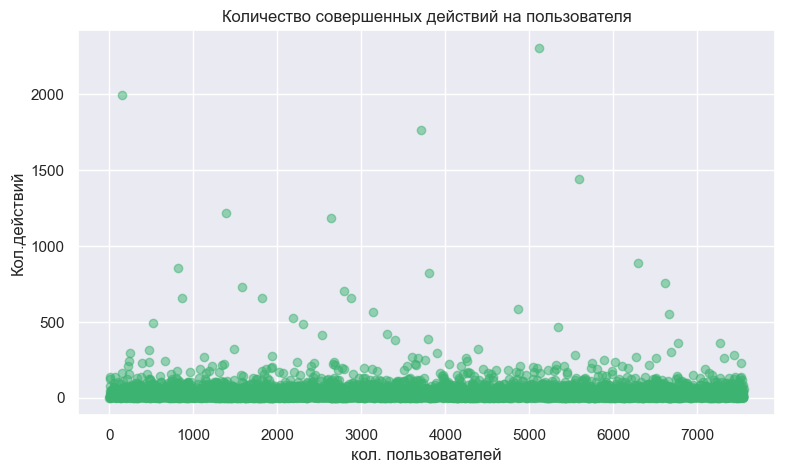

In [17]:
x_values = pd.Series(range(0,len(df['user_id'].unique())))
plt.scatter(x_values, events_for_user['event_name'], color='mediumseagreen', alpha=0.5)

plt.title('Количество совершенных действий на пользователя')
plt.xlabel('кол. пользователей')
plt.ylabel('Кол.действий')
plt.show()

Из таблицы и грвфика видно, что поведение отдельных пользователей сильно отличается, достаточно большоя часть тех, кто совершает только одно действие, такие пользователи видимо дальше главной страницы и не уходят, по каким то причинам  она не вызывает у них дальнейшего интереса, возможно над этим стоит поработать. Медианное значение действий на пользователя 20, в среднем же пользователи совершают 32 действия, этого вполне достаточно для того, что бы зайти на сайт, посмотреть страницы с нужными товарами, оформить заказ и купить их. Однако есть и аномально активные пользователи. Например тот кто совершил за время эксперимента 2307 действий. Но таких пользователей не много не более 1% совершали более 200 действий.

Посмотри еще как выглядит приближенная диаграмма размаха, что бы визуально оценить медиану и интервалы. 

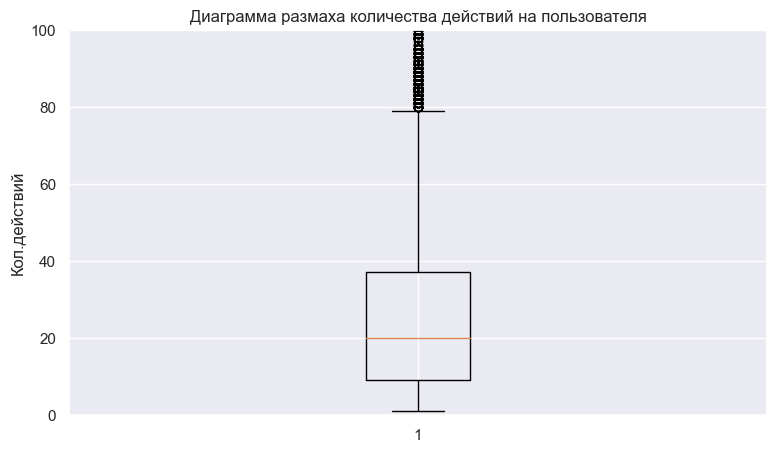

In [18]:
plt.boxplot(events_for_user)
plt.ylim(0,100)
plt.title('Диаграмма размаха количества действий на пользователя')
plt.ylabel('Кол.действий')
plt.show()

По диаграмме видно что действительно большая часть пользователей совершает не более 80 действий, как мы уже находили по процентилям, лишь более 5% совершает больше 89.  
Что бы принять решение о том, стоит ли удалять таких пользователей посмотрим еще на их поведение по каждой из групп.

In [19]:
df.pivot_table(index='user_id',columns='group', values='event_name',aggfunc='count').describe()

group,A,A2,B
count,"2,489.00","2,520.00","2,542.00"
mean,32.21,30.93,33.67
std,65.09,56.30,72.93
min,1.00,1.00,1.00
25%,9.00,9.00,9.00
50%,19.00,19.50,20.00
75%,37.00,37.00,38.00
max,"1,998.00","1,768.00","2,307.00"


В целом в каждой из групп есть очень похожии аномалии и выборки распределены очень схожим образом, значит на результаты тестирования наши сверх активные пользоватеи не должны повлиять. Так как эти люди распределены по группам равномерно, возможно в тест закрались действая кого-то из ай ти команды, но в целом результаты искажать они не должны как раз из за схожего поведения во всех 3х выборках. Оставим всех на месте и не будем удалять никого из данных. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Можно посмотреть на распределение количества событий на пользователя и посмотреть на выбросы построив диаграмму размаха. (рассмотреть медиану, моду, квантили)
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавила разбивку по пользователям </div>

In [20]:
print('минимальная дата:',df['date_time'].min(), 'максимальная дата:', df['date_time'].max())

минимальная дата: 2019-07-25 04:43:36 максимальная дата: 2019-08-07 21:15:17


In [21]:
print('Данные за:',df['date_time'].max() - df['date_time'].min())

Данные за: 13 days 16:31:41


Найдем число событий по дням, а так же их доли от общего числа событий.

In [22]:
table = df.groupby('date').agg({'event_name': 'count'}).reset_index()
table.columns = ['date', 'event_count']
table['pers'] = table['event_count'] / table['event_count'].sum() * 100
table['cum_pers'] = table['pers'].cumsum()
table

,date,event_count,pers,cum_pers
0,2019-07-25,9,0.00,0.00
1,2019-07-26,31,0.01,0.02
2,2019-07-27,55,0.02,0.04
3,2019-07-28,105,0.04,0.08
4,2019-07-29,184,0.08,0.16
5,2019-07-30,412,0.17,0.33
6,2019-07-31,2030,0.83,1.16
7,2019-08-01,36141,14.83,15.99
8,2019-08-02,35554,14.59,30.58
9,2019-08-03,33282,13.66,44.23


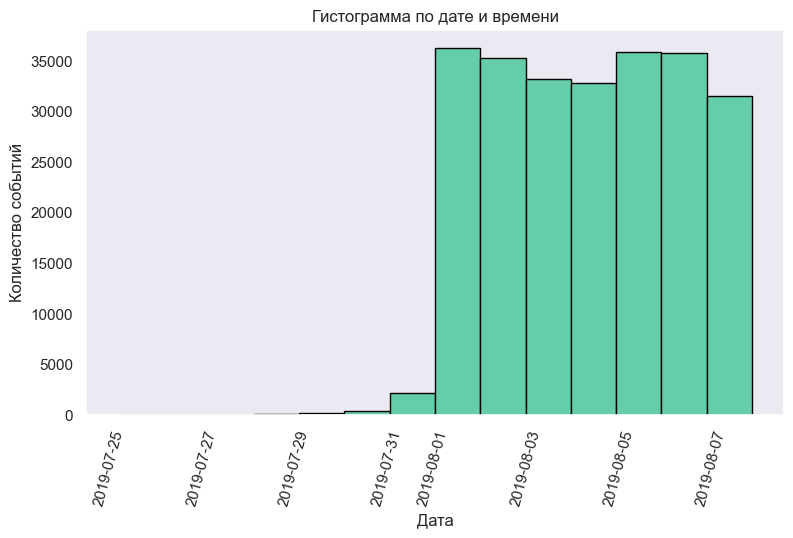

In [23]:
plt.figure(figsize =(9, 5))
df['date_time'].hist(
                bins=14, color='mediumaquamarine', edgecolor='black',grid=False
                )
plt.title('Гистограмма по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=75)

plt.show()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


График построен верно, но он не отражает мелкие детали) В данном случае можно было бы подробнее расмотреть данные за 31 июля и 1 августа и понять когда был точно по часам запущен тест. Так же можно увеличить число корзин, и посмотреть как распределяются события днём и ночью
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Я тут наоборот хотела посмотреть больше на картину в целом, что бы понять данные по дням и в каких данные точно не полные, а уже в после отрезания лишних более конкретно </div>

По построинным таблице и гистограмме видно, что данные равпределены не равномерно. По сути полными данными мы располагаем только с 	2019-08-01	по 2019-08-07. Остальные данные являются старыми и не подходят для исследования так как могут его "перекашивать". Стоит от них избавиться. Получится, что мы откинем 1.16% исходных данных.

In [24]:
print('Событий потеряно:', df.query('date < "2019-08-01"').shape[0])

Событий потеряно: 2826


In [25]:
df_new = df.query('date >= "2019-08-01"')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, данные раньше 1 Августа можно отбросить
</div>

In [26]:
lost_id = df['user_id'].nunique() - df_new['user_id'].nunique()
print(f'Пользователей потеряно: {lost_id}',
      'или {0:.2%}'.format(lost_id / df['user_id'].nunique()))    

Пользователей потеряно: 17 или 0.23%


In [27]:
print('Обновленные данные за:',df_new['date_time'].max() - df_new['date_time'].min())
print('Количество событий:', df_new.shape[0])
print('Количество пользователей', df_new['user_id'].nunique())

Обновленные данные за: 6 days 21:07:49
Количество событий: 240887
Количество пользователей 7534


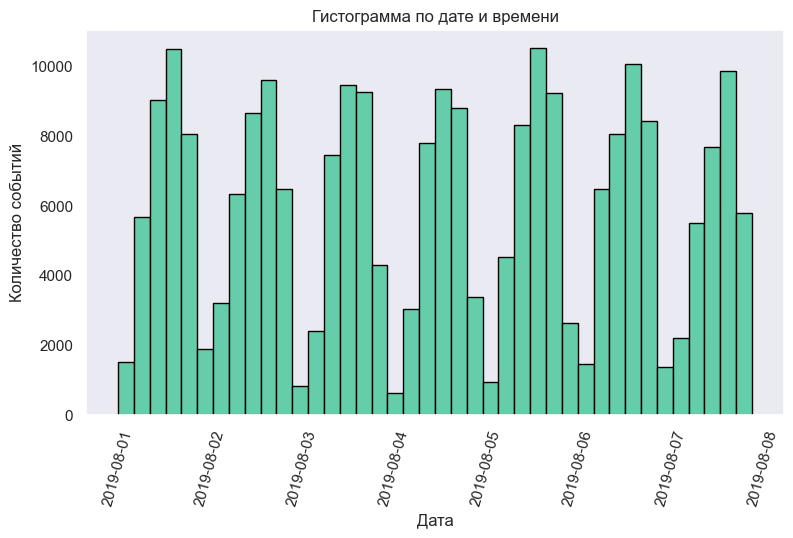

In [28]:
plt.figure(figsize =(9, 5))
df_new['date_time'].hist(
                bins=40, color='mediumaquamarine', edgecolor='black',grid=False
                )
plt.title('Гистограмма по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=75)

plt.show()

Теперь по гистограмме хорошо видно что данные за все оставшиеся дни полные и распределены равномерно с пиками активности пользователей в дневное время.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, это стандартное поведение пользоваталей
</div>

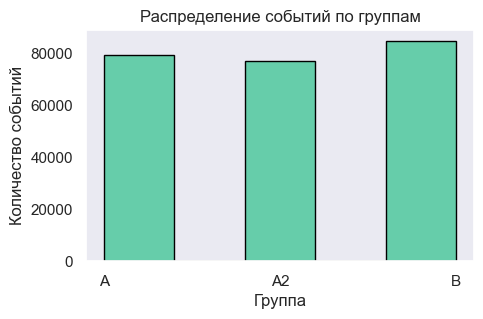

In [29]:
plt.figure(figsize =(5, 3))
df_new['group'].hist(
                bins=5, color='mediumaquamarine', edgecolor='black',grid=False
                )
plt.title('Распределение событий по группам')
plt.xlabel('Группа')
plt.ylabel('Количество событий')


plt.show()

Посмотрим нет ли пользователей, которые попали в несколько групп сразу

In [30]:
print('Пользователей попавших в группы А и А2 одновременно:',(
    len(np.intersect1d(df_new.query('group == "A"')['user_id'].unique(),
                       df_new.query('group == "A2"')['user_id'].unique()))
)
     )

print('Пользователей попавших в группы А и В одновременно:',(
    len(np.intersect1d(df_new.query('group == "A"')['user_id'].unique(),
                       df_new.query('group == "B"')['user_id'].unique()))
)
     )
print('Пользователей попавших в группы А2 и B одновременно:',(
    len(np.intersect1d(df_new.query('group == "B"')['user_id'].unique(),
                       df_new.query('group == "A2"')['user_id'].unique()))
)
     )

Пользователей попавших в группы А и А2 одновременно: 0
Пользователей попавших в группы А и В одновременно: 0
Пользователей попавших в группы А2 и B одновременно: 0


**Вывод**
* После очистки данных от старых у нас получился датасет с 240887 и 7534. Данные представлены за неделю с 1 по 7 августа включительно.
* Было удалено 2826 событий что составляет 1.16% от общего числа и 17 пользователей это 0.23% от всех.
* Оставшиеся данные распределены по всем группам тестирования почти равномерно.
* Пользователи разделены по группам корректно, нет пользователей, которые присутствовали бы в нескольких сразу.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел сделан очень хорошо, всё правильно. Хорошо, что проверила на пересечение между группами
</div>

# Анализ воронки событий

Посмотрим на воронку событий исходя из следующих пунктов:
- [x] Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- [x] Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- [x] Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- [x] По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- [x] На каком шаге теряете больше всего пользователей?
- [x] Какая доля пользователей доходит от первого события до оплаты?

In [31]:
events = df_new['event_name'].value_counts().reset_index()
events.columns = ['event_name', 'event_count']
events['pers'] = events['event_count'] / events['event_count'].sum() * 100
events

,event_name,event_count,pers
0,MainScreenAppear,117328,48.71
1,OffersScreenAppear,46333,19.23
2,CartScreenAppear,42303,17.56
3,PaymentScreenSuccessful,33918,14.08
4,Tutorial,1005,0.42


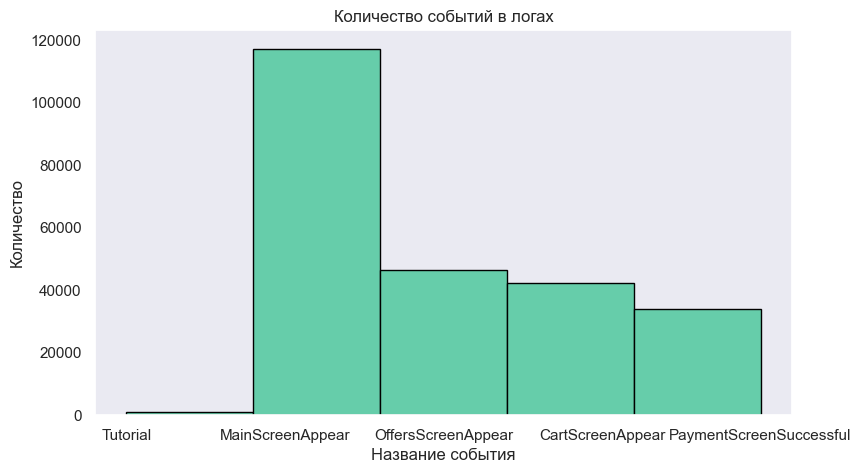

In [32]:
df_new['event_name'].hist(
                bins=5, color='mediumaquamarine', edgecolor='black',grid=False
                )
plt.title('Количество событий в логах')
plt.xlabel('Название события')
plt.ylabel('Количество')


plt.show()

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Неплохо было бы добавить визуализации данных
</div>

Видно что в логах имеется 5 типов событий. Чаще всего просматривают основной экран, далее по количеству просмотров идут экран с предложенными товарами, корзина и экран успешной оплаты. А вот тутариал посмотрело всего 1005 раз это всего 0.42% от всех событий.

Посмотрим теперь как распределены пользователи по событиям.

In [33]:
users = df_new.groupby('event_name').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
users.columns = ['event_name', 'user_count']
users['users_share'] = users['user_count'] / users['user_count'].sum() * 100
users

,event_name,user_count,users_share
0,MainScreenAppear,7419,36.86
1,OffersScreenAppear,4593,22.82
2,CartScreenAppear,3734,18.55
3,PaymentScreenSuccessful,3539,17.59
4,Tutorial,840,4.17


Итак пользователи распределены по событиям тоже соответствующим образом. Больше всего пользователей просматривали главный экран и лишь 4.17% из них смотрели туториал. Но так как туториал не является обязательным событием и смотрят его далеко не все, из воронки его можно убрать, так как там он окажется в самом конце и будет искажать наши результаты. Все остальные события выстраиваются в логичную цепочку. Путь пользователей: *главный экран -> окно с предложением продукта -> окно оплаты -> окно удачной покупки*  
Уберем пользователей смотревших туториал  и посмотри как они двигаются по воронке.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Воронка определена правильно! Tutotial не является частью воронки.
</div>

In [34]:
users = users.query('event_name != "Tutorial"')
users['next_share'] = users['user_count'] / users['user_count'].shift(1) * 100
users

,event_name,user_count,users_share,next_share
0,MainScreenAppear,7419,36.86,NaN
1,OffersScreenAppear,4593,22.82,61.91
2,CartScreenAppear,3734,18.55,81.30
3,PaymentScreenSuccessful,3539,17.59,94.78


В целом пользователи двигаются по воронке очень хорошо. Больше всего отпадает на первом этапе. Из тех кто сморел главный экран почти 62% переходят н экран с предложением продукта, далее на экран оплаты попадает 81% посмотревших продукт и 94.78% перешедших к покупке удачно ее оплачивают.

Посмотрим еще на конверсию на каждом этапе.

In [35]:
users['conversion'] = users['user_count'] / users['user_count'].loc[users.index[0]] * 100 
users

,event_name,user_count,users_share,next_share,conversion
0,MainScreenAppear,7419,36.86,NaN,100.00
1,OffersScreenAppear,4593,22.82,61.91,61.91
2,CartScreenAppear,3734,18.55,81.30,50.33
3,PaymentScreenSuccessful,3539,17.59,94.78,47.70


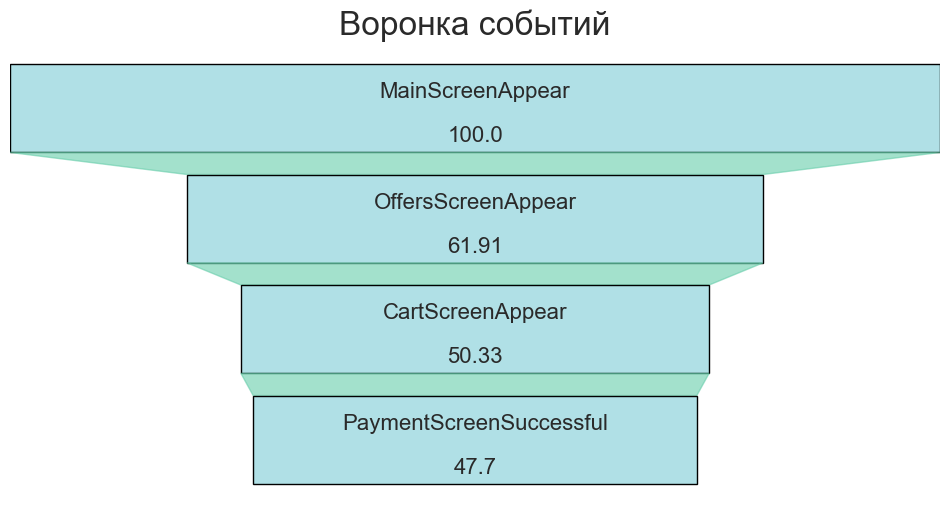

In [36]:
# отрисуем воронку событий
from matplotlib import font_manager as fm

y = [4,3,2,1]
x = round(users['conversion'],2)
labels = users['event_name']
x_max = 100
x_min = 0
x_range = x_max - x_min



fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in enumerate(x):
    left = (x_range - val)/2
    plt.barh(y[idx], x[idx], left = left, color='powderblue',
             height=.8, edgecolor='black')
    # label
    plt.text(50, y[idx]+0.1, labels[idx], ha='center', 
              fontsize=16, color='#2A2A2A')
    # value
    plt.text(50, y[idx]-0.3, x[idx], ha='center',
             fontsize=16, color='#2A2A2A')
    #сделаем красивый переход
    if idx != len(x)-1:
        next_left = (x_range - x[idx+1])/2
        shadow_x = [left, next_left, 
                    100-next_left, 100-left, left]
        
        shadow_y = [y[idx]-0.4, y[idx+1]+0.4, 
                    y[idx+1]+0.4, y[idx]-0.4, y[idx]-0.4]
        plt.fill(shadow_x, shadow_y, color='mediumaquamarine', alpha=0.6)
plt.xlim(x_min, x_max)
plt.axis('off')
plt.title('Воронка событий', loc='center', fontsize=24, color='#2A2A2A')
plt.show()

**Вывод** По воронке хорошо видно, что от просмотра главного экрана события до удачной оплаты доходит 47.7% пользователей. Как и говорилось до этого больше всего пользователей "отваливается" на первом этапе после чего конверсия по шагам весьма хорошая. В целом почти половина пришедших в приложение совершает удачную покупку, результат очень даже хороший. Но стоит обратить внимание на то, почему теряется 5% пользователей на последнем этапе. То есть тех кто перешел на экран оплаты, но почему-то не закончил ее успешно. Возможно пользовтеле просто передумали, но и не исключено, что на этом этапе где-то закралась ошибка.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен с рузультатами, может быть такое, что данные показывают, что большая часть пользователей отсекается между первым и вторым шагом, т.е. между заходом в приложение и добавлением товара в корзину. Может посетителей не устроили цены, а может есть проблемы с отображением кнопки для добавления товара в корзину. Нужно написать разработчикам, пусть проверят
</div>

# Анализ А/А/В теста

Теперь перейдем к анализу результатов тестирования:
- [x] Сколько пользователей в каждой экспериментальной группе?
- [x] Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- [x] Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- [x] Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- [x] Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

In [37]:
#найдем количество пользователей в каждой группе
users_group = df_new.groupby('group').agg({'user_id':'nunique'}).reset_index()
# и добавим столбец с совмещенными группами А теста
users_group.loc[3] = ['A+A2', users_group['user_id'].loc[users.index[0]] + users_group['user_id'].loc[users.index[1]]]
users_group.columns = ['group', 'user_count']
users_group = users_group.set_index(users_group.columns[0])
users_group

,user_count
group,
A,2484
A2,2513
B,2537
A+A2,4997


В каждой из тестируемых групп у нас +-2500 пользователей. Как мы уже выясняли все пользователи в каждой группе уникальны. Попавших более чем в одну группу нет.

## Провевка А/А теста

Критерии успешного A/A-теста: 
* Количество пользователей в различных группах различается не более, чем на 1%;
* Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
* Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
* Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

Посмотрим на соотношенем пользователей

In [38]:
x = (
    (1 - (df_new.query('group =="A"')['user_id'].nunique() /
    df_new.query('group =="A2"')['user_id'].nunique())) * 100

) 

In [39]:
print('Количество пользователей в группах отличается на', round(x,2),'%')

Количество пользователей в группах отличается на 1.15 %


Раздница между количеством пользователей чуть больше 1%, но значение не критично.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Равный размер групп дает оптимальную длительность теста, но, вообще, группы просто должны быть достаточно большими и не обязательно равными.
    
---
    
Вот здесь подробно расписано, что не все так страшно в несбалансированных выборках
    
https://medium.com/statistics-experiments/%D0%B4%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81-%D0%B2-a-b-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-%D0%B5%D1%81%D1%82%D1%8C-%D0%BB%D0%B8-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-99-1-%D0%B8-50-50-%D0%B2-%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%85-11c8f4fe7eb4
</div>

In [40]:
df_new.query('event_name != "Tutorial"').groupby(['group', 'event_name']).agg({'user_id':'nunique'})

user_id
group event_name                      
A     CartScreenAppear            1266
      MainScreenAppear            2450
      OffersScreenAppear          1542
      PaymentScreenSuccessful     1200
A2    CartScreenAppear            1238
      MainScreenAppear            2476
      OffersScreenAppear          1520
      PaymentScreenSuccessful     1158
B     CartScreenAppear            1230
      MainScreenAppear            2493
      OffersScreenAppear          1531
      PaymentScreenSuccessful     1181

Во всех группах пользователи совершают одни и те же события, тут все корректно. 

Посмотрим есть ли статистические различия между группами по самому популярному событию, то есть просмотру главного экрана. Сформулируем гипотезы, воспользуемся z-критерием и применим метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение.

* **Н0** Различий между группами A и А1 нет.
* **Н1** Раздичия между группами А и А1 есть.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

In [41]:
df_pv = (
    df_new.query('event_name != "Tutorial"')
    .pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')
    .sort_values('A', ascending=False)
)
df_pv['A+A2'] = df_pv['A'] + df_pv['A2']
df_pv

group,A,A2,B,A+A2
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


In [42]:
# напишим функцию для проверки
# Воспользуемся Z-критерием
def z_test(group1, group2, event, alpha): 
    p1_event = df_pv.loc[event, group1]
    p2_event = df_pv.loc[event, group2] 
    p1_users = users_group.loc[group1, 'user_count'] 
    p2_users = users_group.loc[group2, 'user_count'] 
    p1 = p1_event / p1_users 
    p2 = p2_event / p2_users 
    print(p1_event,p2_event ,p1_users, p2_users)
    difference = p1 - p2
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
   
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(group1, group2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу о равенстве конверсии в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах")

In [43]:
z_test('A','A2','MainScreenAppear', 0.05/16)

2450 2476 2484 2513
Проверка для групп A и A2, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах


В случае с главных событием не удается отвергнуть нулевую гипотезу. Следовательно различий между группами по самому популярному событию нет. Пройдемся теперь по остальным событиям.

In [44]:
for event in df_pv.index:
    z_test('A', 'A2', event, 0.05/16)
    print()

2450 2476 2484 2513
Проверка для групп A и A2, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1542 1520 2484 2513
Проверка для групп A и A2, событие: OffersScreenAppear, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1266 1238 2484 2513
Проверка для групп A и A2, событие: CartScreenAppear, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1200 1158 2484 2513
Проверка для групп A и A2, событие: PaymentScreenSuccessful, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**Вывод** Между группами А/А теста разницы нету. A/A тест по всем критериям можно считать успешным.

## Проверка A/A/B теста

Посмотрим теперь на различия между группой с измененным дизайном (B) и всеми остальными. Для этого сформулируем ряд гипотез.

* **Н0** различия между группами А и В по  событиям нет.
* **Н1** различия между А и В по событиям есть.

In [45]:
for event in df_pv.index:
    z_test('A', 'B', event, 0.05/16)
    print()

2450 2493 2484 2537
Проверка для групп A и B, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1542 1531 2484 2537
Проверка для групп A и B, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1266 1230 2484 2537
Проверка для групп A и B, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1200 1181 2484 2537
Проверка для групп A и B, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**Вывод** p-value во всех выборках больше критического уровня значимости. Следовательно у нас нет оснований отвергать нулевую гипотезу. Между группами А и В так же нет различий ни по одному из событий. 

* **Н0** различия между группами А и В по  событиям нет.
* **Н1** различия между А2 и В по событиям есть.

In [46]:
for event in df_pv.index:
    z_test('A2', 'B', event, 0.05/16)
    print()

2476 2493 2513 2537
Проверка для групп A2 и B, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1520 1531 2513 2537
Проверка для групп A2 и B, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1238 1230 2513 2537
Проверка для групп A2 и B, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

1158 1181 2513 2537
Проверка для групп A2 и B, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**Вывод** Между группами А2 и В тоже нет различий ни по одному из событий. 

* **Н0** различия между группами А и В по  событиям нет.
* **Н1** различия между А+А2 и В по событиям есть.

In [47]:
for event in df_pv.index:
    z_test('A+A2', 'B', event, 0.05/16)
    print()

4926 2493 4997 2537
Проверка для групп A+A2 и B, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

3062 1531 4997 2537
Проверка для групп A+A2 и B, событие: OffersScreenAppear, p-значение: 0.43
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

2504 1230 4997 2537
Проверка для групп A+A2 и B, событие: CartScreenAppear, p-значение: 0.18
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

2358 1181 4997 2537
Проверка для групп A+A2 и B, событие: PaymentScreenSuccessful, p-значение: 0.60
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



**Вывод** И снова разницы между группами мы не видим.  
Не удолос отвергнуть ни одну из поставленнных гипотез. Следовательно статистически значимых различий между каждой из проверенных пар выборок нет. 

**Поправки на уровень значимости**  
Так как у нас были множественные тесты мы воспользовались поправками Бонферрони, где уровень узачимости расчитывается как альфа деленая на число проверяемых гипотез.  
Поэтому для нашего A/A/В теста мы установили уровеньзначимости 0.05/16, так как делаем 16 сравнений , где 0.05 это стандартный критический уровень значимости.

**Вывод** Видимо изменение шрифта никак не повлияло на действия пользователей.
 Плохо это или хорошо может зависить от дальшейших планов и от того каких собственно действий ожидали от эксперимента. Если это лишь начальная стадия изменения дизайна, то результат уже будет позитивным от того, что пользователи не отваливаются на этом этапе и можно переходить к более серьезным изменениям. Если же только на этих изменениях планировалось привлечь больше пользователей, то это не удалось. Но в целом менеджерам уже можно не переживать что изменения шрифта скажутся плохо.

# Общие выводы

В данной работе целью являлось изучение поведения пользователей в приложении по продаже продуктов питания. Анализ воронки событий и изучение результатов проведенного А/А/В тестирования (Смена шрифта во всех приложении). По итогу можно сделать следующие выводы:
* Данные были предоставлены с 25.07.2019 по 08.08.2019 но часть данных была не полной и устаревшей. Поэтоиу после удаления мы получили рабочие данные за неделю с 01.08.2019 по 08.08.2019.
* На этапе предобработки в данных были найдены и удалены дубликаты а так же после обнаружения старых дат удалены и они всего мы потеряли чуть более 1% исходных данных.
* Были изучены поведение пользователей. И обнаружилось что в средней человек совершает около 20-30 действий в приложении. Этого вполне достаточно что бы собрать и успешно совершить покупку. Однако большая чать совершает лишь одно действие возможно как то можно повлиятб на таких пользователей что бы главный экран у них вызывал больше интереса и они переходили дальше.
* Были изучены все события  в логе и установлено, что меньше всего люди смотрят туториал, большинство его видимо просто игнорируют. Но и в принципе многие люди надеяться на свою интуицию и что сами разберуться как пользоваться продуктом. Так что эта страница не обязательная и из воронки мы ее исключили, иначебы она искажала результаты. Но в малом количестве просмотров есть и вероятность того, что переход и открытие туториала плохо заметно. Может стоит обратить на это внимание.
* По воронке событий мы видим, что большинство пользователей отваливается на начальном этапе. До просмотра товаров доходит больше половины, но на этом этапе часто отсеивается большинство просто в принципе не заинтересованных в продукте либо бользователи могут сразу открывать страницу с каталогом товаров минуя главную. Успешную покупку совершает чуть меньше половины от всех пользователей. Но вот на этапе оплаты отваливается несколько процентов, возможно стоит обратить внимание, нет ли какой то ошибки в этой форме страницы связанной с невозможностью оплаты например в определенного девайса.
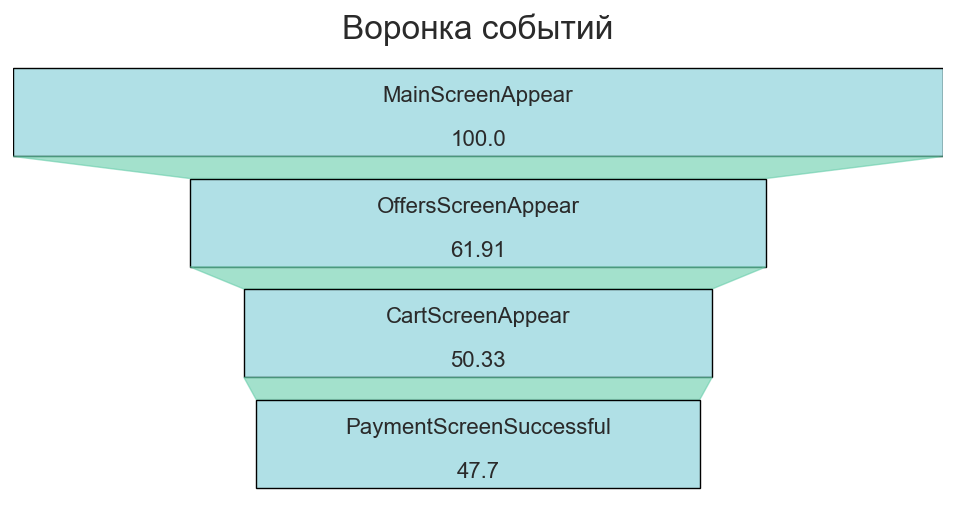

* По проведенному тестированию можно сделать выводы, что изменение шрифта никак не повлияло на поведение пользователей. То есть основная его цель, убедиться что пользователи не будут "отваливаться" из за изменений достигнута.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 

---

У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Поправка Бонферрони


---


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

От себя хочу порекомендовать тебе отличные источники про AB тестирование
    
- Книга Доверительное A/B тестирование | Рон Кохави (https://dmkpress.com/catalog/computer/software_development/978-5-97060-913-2/)
- Как устроено A/B-тестирование в Авито (https://habr.com/ru/company/avito/blog/454164/)
- Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 1 (https://habr.com/ru/company/avito/blog/571094/)
- Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 2 (https://habr.com/ru/company/avito/blog/571096/)
    
---
    

В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов на SQL 😊
</div>